In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('PositionControl/sac_L_min_force_length_025_1.csv')

<Axes: xlabel='Step', ylabel='Value'>

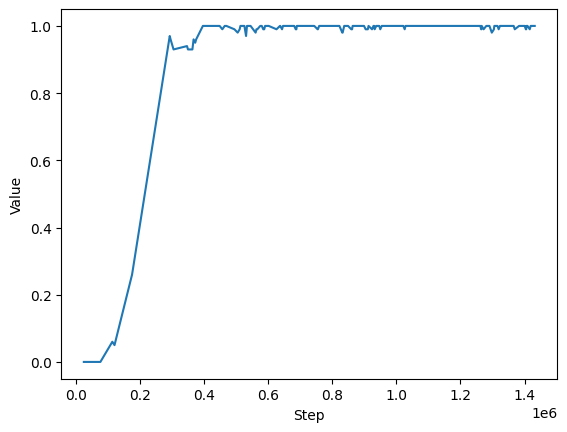

In [10]:
sns.lineplot(df.iloc[:250], x='Step', y='Value')

In [32]:
df = pd.read_csv('PositionControl/evaluation/sac_L_min_force_length_025.csv')

In [33]:
df.groupby('init_distance').apply(lambda x: x['success'].mean())

init_distance
5.0      0.988
50.0     0.996
100.0    1.000
200.0    0.996
300.0    0.998
400.0    0.998
500.0    0.994
dtype: float64

In [34]:
df.groupby('init_distance').apply(lambda x: x['corridor_width'].mean())

init_distance
5.0       7.750398
50.0      9.937294
100.0    12.728833
200.0    17.827965
300.0    23.603522
400.0    29.573789
500.0    37.448010
dtype: float64

<ErrorbarContainer object of 3 artists>

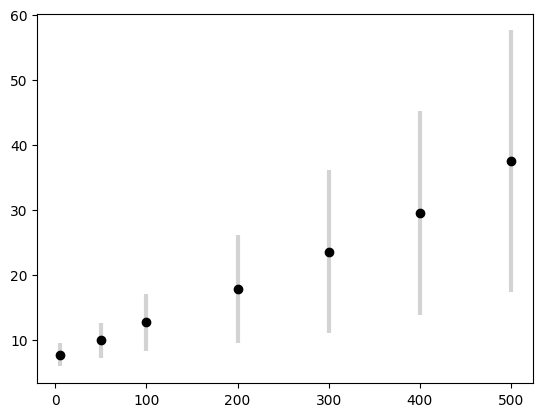

In [35]:
aux_df = df.groupby('init_distance').apply(lambda x: x['corridor_width'].mean())
x = list(aux_df.index)
y = list(aux_df.values)
dy = list(df.groupby('init_distance').apply(lambda x: x['corridor_width'].std()))
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)

In [36]:
df.groupby('init_distance').apply(lambda x: x['trajectory_efficiency'].mean())

init_distance
5.0      1.456104
50.0     1.052236
100.0    1.039342
200.0    1.033840
300.0    1.029654
400.0    1.028779
500.0    1.028178
dtype: float64

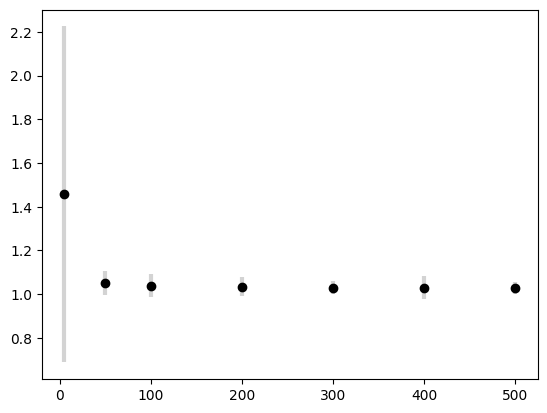

In [37]:
aux_df = df.groupby('init_distance').apply(lambda x: x['trajectory_efficiency'].mean())
x = list(aux_df.index)
y = list(aux_df.values)
dy = list(df.groupby('init_distance').apply(lambda x: x['trajectory_efficiency'].std()))
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);